<a href="https://colab.research.google.com/github/alitaspaul/DSP-LAB/blob/master/Experiment5_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  EXPERIMENT-5

---



**Discrete Fourier Transform**

---


DATE: 11/09/2023

---



AIM:

Write a program to find DFT of any sequence using:

i) mathematical expression

ii) matrix form(twiddle factor)

Plot magnitude and phase response .

---



SOFTWARE USED:

Python


---


THEORY:

Discrete Fourier Transform is a powerful computation tool which allows us to evaluate the Fourier Transform X(𝑒jω) on a digital computer or specially designed digital hardware. Since X(𝑒jω ) is continuous and periodic, the DFT is obtained by sampling one period of the Fourier Transform at a finite number of frequency points. Apart from determining the frequency content of a signal, DFT is used to perform linear filtering operations in the frequency domain.
The sequence of N complex numbers𝑥0,..., 𝑥𝑁−1 is transformed into the sequence of N complex numbers 𝑋0,..., 𝑋𝑁−1 by the DFT according to the formula:

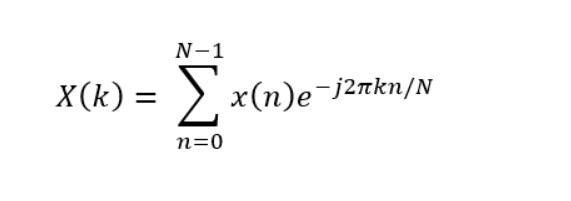


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [ ]:
#using mathematical equation:
x = np.array(input("Enter the sequence:").split(",")).astype(int)

k = len(x)
k_array = np.arange(0,k,1)

#output array
y = np.zeros(k,dtype = 'complex') #because we need a complex matrix as output

for i in range (k):
  sum = 0
  for m in range (k):
    sum += x[m]*np.exp(complex(-1j)*2*np.pi*i*m*float(1/k))
  y[i] = sum
print("The DFT of the input sequence using Mathematical expression is:\n",y)

#magnitude plot
mag_y = [abs(k) for k in y ]
plt.stem(k_array,mag_y)
plt.title("Magnitude Plot")
plt.xlabel("Value of k")
plt.ylabel("|X[k]|")
plt.show()

#Phase Plot
phase_y = [cmath.phase(k) for k in y]
plt.stem(k_array,phase_y)
plt.title("Phase Plot")
plt.xlabel("Value of k")
plt.ylabel("<X[k]")
plt.show()

Enter the sequence:1,1,1,1
Enter the value of N to find N-point DFT: 8
The DFT of the input sequence using Mathematical expression,N-point is:
 [ 4.00000000e+00+0.00000000e+00j  1.00000000e+00-2.41421356e+00j
 -1.83697020e-16-2.22044605e-16j  1.00000000e+00-4.14213562e-01j
  0.00000000e+00-2.44929360e-16j  1.00000000e+00+4.14213562e-01j
  3.29046455e-16-3.33066907e-16j  1.00000000e+00+2.41421356e+00j]
The DFT of the input sequence using Mathematical expression is:
 [ 4.00000000e+00+0.00000000e+00j -1.83697020e-16-2.22044605e-16j
  0.00000000e+00-2.44929360e-16j  3.29046455e-16-3.33066907e-16j]


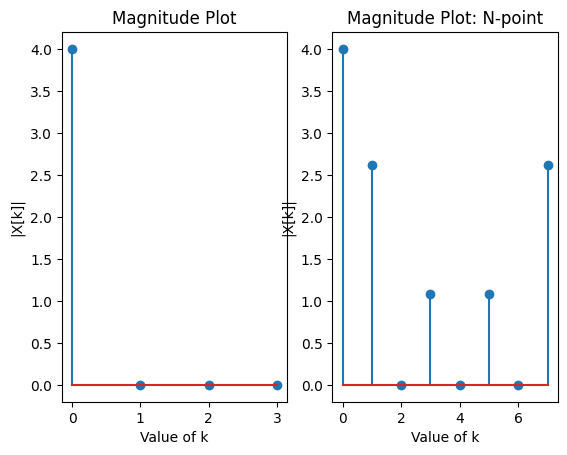

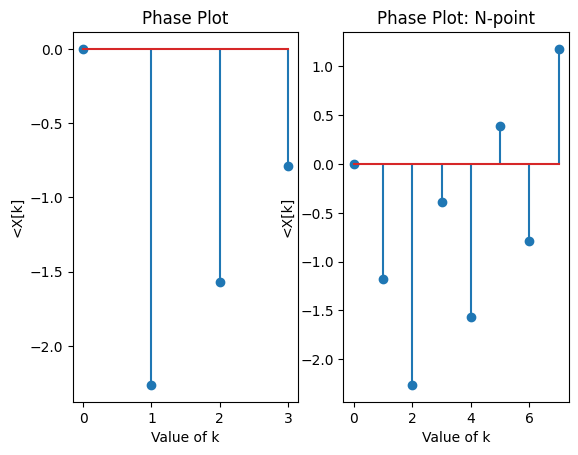

In [ ]:
#using mathematical equation:- N-point DFT:
x = np.array(input("Enter the sequence:").split(",")).astype(int)
xn = x
N = int(input("Enter the value of N to find N-point DFT:"))


if len(x)!= N:
  if N>len(x):
    z = np.zeros(N-len(x)).astype(int)
    x = np.concatenate((x,z))  # to merge two arrays, i.e to do zero padding in this case, for N-point DFT

def dft(x):
  k = len(x)
  k_array = np.arange(0,k,1)

  #output array
  y = np.zeros(k,dtype = 'complex') #because we need a complex matrix as output
  for i in range (k):
    sum = 0
    for m in range (k):
      sum += x[m]*np.exp(complex(-1j)*2*np.pi*i*m*float(1/k))
    y[i] = sum
  return y

my = dft(x)
myn = dft(xn)

print("The DFT of the input sequence using Mathematical expression,N-point is:\n",dft(x))
print("The DFT of the input sequence using Mathematical expression is:\n",dft(xn))

k = len(x)
k_array = np.arange(0,k,1)

kn = len(xn)
kn_array = np.arange(0,kn,1)

#magnitude plot
mag_yn = [abs(kn) for kn in myn]
plt.subplot(1,2,1)
plt.stem(kn_array,mag_yn)
plt.title("Magnitude Plot")
plt.xlabel("Value of k")
plt.ylabel("|X[k]|")

mag_y = [abs(k) for k in my]
plt.subplot(1,2,2)
plt.stem(k_array,mag_y)
plt.title("Magnitude Plot: N-point")
plt.xlabel("Value of k")
plt.ylabel("|X[k]|")
plt.show()

#Phase Plot
phase_yn = [cmath.phase(kn) for kn in myn]
plt.subplot(1,2,1)
plt.stem(kn_array,phase_yn)
plt.title("Phase Plot")
plt.xlabel("Value of k")
plt.ylabel("<X[k]")

phase_y = [cmath.phase(k) for k in my]
plt.subplot(1,2,2)
plt.stem(k_array,phase_y)
plt.title("Phase Plot: N-point")
plt.xlabel("Value of k")
plt.ylabel("<X[k]")
plt.show()


Enter the sequence:1,2,3,4
[[ 1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j
   1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
  -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j -1.0000000e+00-1.2246468e-16j
   1.0000000e+00+2.4492936e-16j -1.0000000e+00-3.6739404e-16j]
 [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16+1.0000000e+00j
  -1.0000000e+00-3.6739404e-16j  5.5109106e-16-1.0000000e+00j]]
The DFT of the input sequence using twiddle matrix is:
 [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


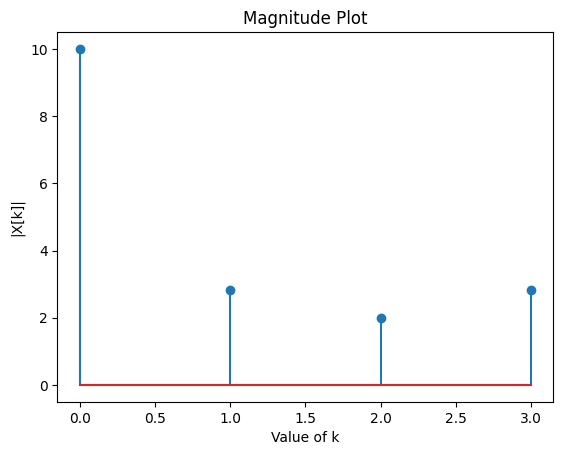

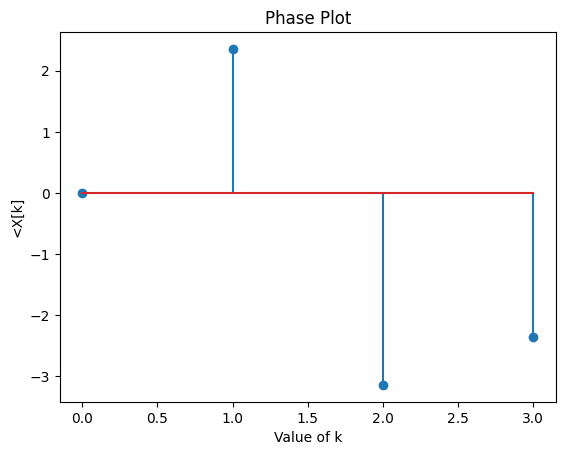

In [ ]:
#using matrix form
x = np.array(input("Enter the sequence:").split(",")).astype(int)

k = len(x)
k_array = np.arange(0,k,1)

#twiddle matrix
twiddle = np.ones(k, dtype = "complex")

for i in range (1,k):
  for j in range (k):
    num = np.exp(complex(-1j)*2*np.pi*i*j*float(1/k))
    twiddle = np.append(twiddle,num)

twiddle.shape = (k,k)
print(twiddle)

#output sequence
y = np.dot(twiddle,x)
print("The DFT of the input sequence using twiddle matrix is:\n", y)

print(np.fft.fft(x))

#magnitude plot
mag_y = [abs(k) for k in y ]
plt.stem(k_array,mag_y)
plt.title("Magnitude Plot")
plt.xlabel("Value of k")
plt.ylabel("|X[k]|")
plt.show()

#Phase Plot
phase_y = [cmath.phase(k) for k in y]
plt.stem(k_array,phase_y)
plt.title("Phase Plot")
plt.xlabel("Value of k")
plt.ylabel("<X[k]")
plt.show()



